In [6]:
import psycopg2  
import pprint  

In [41]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(dbname='yalgdb', user='postgres',
                            password='password', host='localhost', port=5439)
cursor = conn.cursor()

cursor.execute("SELECT data.type, data.gender, COUNT(data.count) FROM (WordCountAttributes NATURAL JOIN WORDS) \
                AS data GROUP BY data.type, data.gender")
rows = cursor.fetchall()
conn.close() 


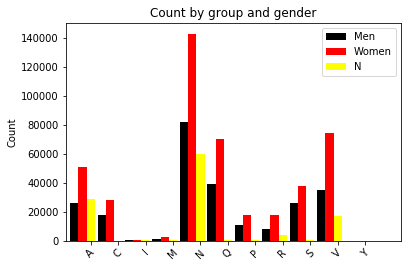

In [42]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

## the data
men = []
women = []
N = []
for row in rows:
    if row[1] == "male":
        men.append(row[2])
    elif row[1] == "female":
        women.append(row[2])
    else:
        N.append(row[2])
## necessary variables
ind = np.arange(len(men))             # the x locations for the groups
width = 0.3                     # the width of the bars

## the bars
rects1 = ax.bar(ind, men, width, color='black')

rects2 = ax.bar(ind+width, women, width, color='red')

rects3 = ax.bar(ind+width+width, N, width, color='yellow')

# axes and labels
ax.set_xlim(-width,len(ind)+3*width)
ax.set_ylim(0,150000)
ax.set_ylabel('Count')
ax.set_title('Count by group and gender')
xTickMarks = ['A', 'C', 'I', 'M', 'N', 'Q', 'P', 'R', 'S', 'V', 'Y']
ax.set_xticks(ind+2*width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Men', 'Women', 'N') )

plt.show()


In [55]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(dbname='yalgdb', user='postgres',
                            password='password', host='localhost', port=5439)
cursor = conn.cursor()

cursor.execute("SELECT data.word, data.gender, COUNT(data.count) as cnt FROM (WordCountAttributes NATURAL JOIN WORDS) \
                AS data WHERE data.gender = 'female' GROUP BY data.word, data.gender \
                ORDER BY data.gender, cnt DESC")
rows = cursor.fetchall()
conn.close() 


In [57]:
import psycopg2
import pandas as pd
conn = psycopg2.connect(dbname='yalgdb', user='postgres',
                            password='password', host='localhost', port=5439)
cursor = conn.cursor()

cursor.execute("SELECT data.word, data.gender, COUNT(data.count) as cnt FROM (WordCountAttributes NATURAL JOIN WORDS) \
                AS data WHERE data.gender = 'male' GROUP BY data.word, data.gender \
                ORDER BY data.gender, cnt DESC")
rows2 = cursor.fetchall()
conn.close() 

In [58]:
words_by_female = [row[0] for row in rows]
words_by_male = [row[0] for row in rows2]

In [59]:
from stop_words import get_stop_words

stop_words = get_stop_words('ru')

words_by_female_delete_stop_words = [word for word in words_by_female if word not in stop_words]
words_by_male_delete_stop_words = [word for word in words_by_male if word not in stop_words]

In [61]:
print(words_by_female_delete_stop_words[:10], words_by_male_delete_stop_words[:10])

['свой', 'любить', 'друг', 'знать', 'новый', 'самый', 'фото', 'любовь', 'нужный', 'хороший'] ['свой', 'друг', 'игра', 'новый', 'самый', 'любить', 'знать', 'мир', 'смотреть', 'слово']


In [143]:
import psycopg2

conn = psycopg2.connect(dbname='yalgdb', user='postgres',
                            password='password', host='localhost', port=5439)
cursor = conn.cursor()

cursor.execute("SELECT data.type,\
                CASE \
                   when (data.year - data.year_of_birth) <= 17 then 17\
                   when (data.year - data.year_of_birth) <= 25 and (data.year - data.year_of_birth) > 17 then 25\
                   when (data.year - data.year_of_birth) > 25 and (data.year - data.year_of_birth) <= 35 then 35\
                   when (data.year - data.year_of_birth) > 35 and (data.year - data.year_of_birth) <= 50 then 50\
                   when (data.year - data.year_of_birth) > 50 and (data.year - data.year_of_birth) <= 80 then 80\
                   when (data.year - data.year_of_birth) > 80               then 81\
                end as old, COUNT(data.count) \
                FROM (WordCountAttributes NATURAL JOIN WORDS) \
                AS data GROUP BY data.type, old ")

rows = cursor.fetchall()
conn.close() 


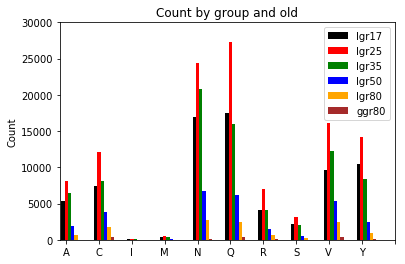

In [169]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)

## the data
lgr17 = []
lgr25 = []
lgr35 = []
lgr50 = []
lgr80 = []
ggr80 = []
N = []
for row in rows:
    if row[1] == 17:
        lgr17.append(row[2])
    elif row[1] == 25:
        lgr25.append(row[2])
    elif row[1] == 35:
        lgr35.append(row[2])
    elif row[1] == 50:
        lgr50.append(row[2])
    elif row[1] == 80:
        lgr80.append(row[2])
    elif row[1] == 81:
        ggr80.append(row[2])
    else:
        N.append(row[2])
ggr80.append(0)
## necessary variables
ind = np.arange(len(men))*5            # the x locations for the groups
width = 0.5                   # the width of the bars

## the bars
rects1 = ax.bar(ind, lgr17, width, color='black')

rects2 = ax.bar(ind+width, lgr25, width, color='red')

rects3 = ax.bar(ind+2*width, lgr35, width, color='green')

rects4 = ax.bar(ind+3*width, lgr50, width, color='blue')

rects5 = ax.bar(ind+4*width, lgr80, width, color='orange')

rects6 = ax.bar(ind+5*width, ggr80, width, color='brown')

#rects7 = ax.bar(ind+6*width, N, width, color='yellow')

# axes and labels
ax.set_xlim(-width,len(ind)+5*width)
ax.set_ylim(0,30000)
ax.set_ylabel('Count')
ax.set_title('Count by group and old')
xTickMarks = ['A', 'C', 'I', 'M', 'N', 'Q', 'R', 'S', 'V', 'Y']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), ('lgr17', 'lgr25', 'lgr35', 'lgr50', 'lgr80', 'ggr80') )

plt.show()

Y аббревиатура
Q частица
V глагол
S предлог
R наречие
I междометие
A прилагательное
C союз
N существительное
P местоимение
M числительное

In [31]:
import psycopg2

conn = psycopg2.connect(dbname='yalgdb', user='postgres',
                            password='password', host='localhost', port=5439)
cursor = conn.cursor()

cursor.execute("SELECT data.type,\
                CASE \
                   when data.city = 'Москва' then 'Москва'\
                   when data.city = 'Петербург' then 'Петербург'\
                   when data.city = 'Киев' then 'Киев'\
                   when data.city = 'Краснодар' then 'Краснодар'\
                   when data.city = 'Казань' then 'Казань'\
                   when data.city is NULL then 'None'\
                   else 'остальные'\
                end as ct, COUNT(data.count) \
                FROM (WordCountAttributes NATURAL JOIN WORDS) AS data \
                GROUP BY data.type, ct\
                ORDER BY data.type, ct ")

rows = cursor.fetchall()
conn.close() 


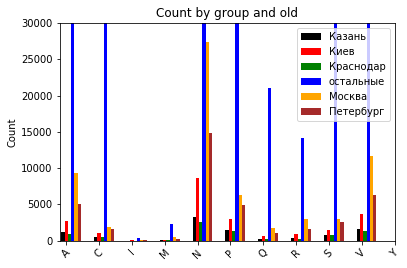

In [40]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(1)
ax = fig.add_subplot(111)

## the data
mos = []
saint = []
kiev = []
kras = []
kazan = []
el = []

for row in rows:
    if row[1] == "Москва":
        mos.append(row[2])
    elif row[1] == "Петербург":
        saint.append(row[2])
    elif row[1] == "Киев":
        kiev.append(row[2])
    elif row[1] == "Краснодар":
        kras.append(row[2])
    elif row[1] == "Казань":
        kazan.append(row[2])
    elif row[1] == "остальные":
        el.append(row[2])
    else:
        continue

## necessary variables
ind = np.arange(len(mos))*5            # the x locations for the groups
width = 0.5                   # the width of the bars
kazan.append(0)
kras.append(0)
## the bars
rects1 = ax.bar(ind, kazan, width, color='black')

rects2 = ax.bar(ind+width, kiev, width, color='red')

rects3 = ax.bar(ind+2*width, kras, width, color='green')

rects4 = ax.bar(ind+3*width, el, width, color='blue')

rects5 = ax.bar(ind+4*width, mos, width, color='orange')

rects6 = ax.bar(ind+5*width, saint, width, color='brown')

#rects7 = ax.bar(ind+6*width, N, width, color='yellow')

# axes and labels
ax.set_xlim(-width,len(ind)+5*width)
ax.set_ylim(0,30000)
ax.set_ylabel('Count')
ax.set_title('Count by group and old')
xTickMarks = ['A', 'C', 'I', 'M', 'N', 'P', 'Q', 'R', 'S', 'V', 'Y']
ax.set_xticks(ind+width)
xtickNames = ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

## add a legend
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0], rects5[0], rects6[0]), ('Казань',  'Киев', 'Краснодар', 'остальные', 'Москва', 'Петербург' ) )

plt.show()